<a href="https://colab.research.google.com/github/Leo22080/metrica_avalicao_aprendizado/blob/main/metricas_avaliacao_aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métricas de Avaliação de Aprendizado

In [ ]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
print(train_images.shape)
print(test_images.shape)
print(np.unique(train_labels))

(60000, 28, 28)
(10000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


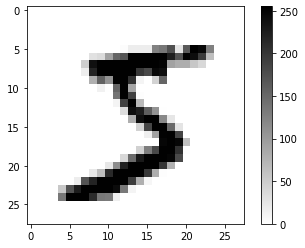

In [ ]:
plt.figure()
plt.imshow(train_images[0], cmap='binary')
plt.colorbar()

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(28,28,1)))

model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))          
          
model.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu', input_shape=(28,28,1)))

model.add(keras.layers.MaxPooling2D(pool_size=[2,2], strides=2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 1024)              3

In [ ]:
train_images = train_images.reshape(train_images.shape[0],
                                 train_images.shape[1],
                                 train_images.shape[2],
                                 1)

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 20s 4ms/step - loss: 0.2385 - accuracy: 0.9571
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0624 - accuracy: 0.9818
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0531 - accuracy: 0.9848
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0529 - accuracy: 0.9858
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0466 - accuracy: 0.9876


In [ ]:
predictions = model.predict(test_images)
print('Scores para o objeto #0 no teste')
print(predictions[0])
print('Classe predicts =' + str(np.argmax(predictions[0])))

313/313 [==============================] - 1s 2ms/step
Scores para o objeto #0 no teste
[2.5363981e-21 2.8517467e-15 5.7946176e-11 3.0286227e-16 3.5768354e-16
 1.8608147e-21 4.8946518e-21 1.0000000e+00 5.4508762e-18 1.1718008e-13]
Classe predicts =7


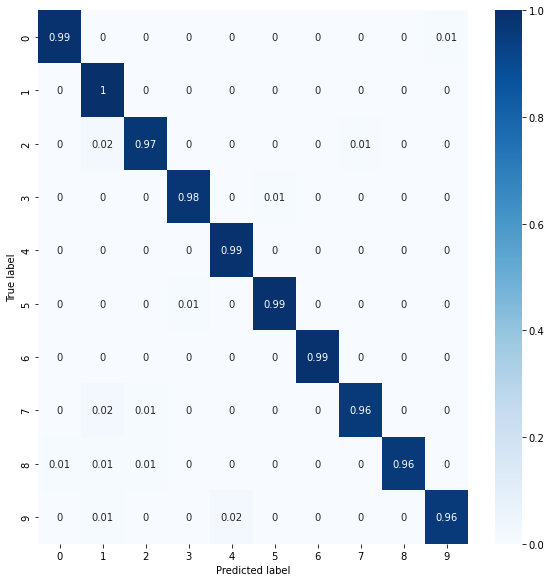

In [ ]:
classes=[0,1,2,3,4,5,6,7,8,9]

con_mat = tf.math.confusion_matrix(test_labels, predictions.argmax(axis=1)).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

conf_mx = confusion_matrix(test_labels, predictions.argmax(axis=1))
conf_mx

array([[ 966,    2,    4,    0,    0,    0,    1,    0,    0,    7],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,   22, 1001,    0,    2,    0,    0,    7,    0,    0],
       [   0,    0,    4,  991,    0,   11,    0,    2,    2,    0],
       [   0,    1,    1,    0,  976,    0,    2,    1,    0,    1],
       [   0,    0,    1,    6,    1,  879,    4,    0,    1,    0],
       [   0,    3,    1,    0,    1,    4,  946,    0,    2,    1],
       [   0,   25,   12,    0,    5,    0,    0,  986,    0,    0],
       [   6,   12,    5,    1,    2,    4,    3,    2,  938,    1],
       [   0,    9,    4,    0,   22,    4,    0,    3,    2,  965]])

### Verdadeiros positivos (VP)

In [ ]:
#Obtendo os elementos da diagonal principal da matriz de confusão, os verdadeiros positivos (TP) por classe

vp = conf_mx.diagonal()
vp

array([ 966, 1135, 1001,  991,  976,  879,  946,  986,  938,  965])

### Verdadeiros negativos (VN)

In [ ]:
#Verdadeiros negativos: a soma dos elementos da diagonal principal menos o verdadeiro positivo da classe

vn = np.array([np.concatenate((vp[:i], vp[i+1:])).sum() for i in range(10)])
vn

array([8817, 8648, 8782, 8792, 8807, 8904, 8837, 8797, 8845, 8818])

### Falsos negativos (FN)

In [ ]:
#Falsos negativos: somatório das colunas menos o elemento da diagonal principal

fn = conf_mx.sum(axis=1) - vp
fn

array([14,  0, 31, 19,  6, 13, 12, 42, 36, 44])

### Falsos positivos (FP)

In [ ]:
#Falso negativos: soma dos elementos das linhas menos o elemento da diagonal principal

fp = conf_mx.sum(axis=0) - vp
fp

array([ 6, 74, 32,  7, 33, 23, 10, 15,  7, 10])

### Sensibilidade (recall ou revocação)
# VP / (VP+FN)

In [ ]:
sensibilidade = vp / (vp + fn)
sensibilidade

array([0.98571429, 1.        , 0.96996124, 0.98118812, 0.99389002,
       0.98542601, 0.9874739 , 0.95914397, 0.96303901, 0.95639247])

### Especificidade
# VN / (FP+VN)

In [ ]:
especificidade = vn / (fp + vn)
especificidade

array([0.99931996, 0.99151571, 0.99636941, 0.99920446, 0.99626697,
       0.99742355, 0.99886967, 0.99829778, 0.99920922, 0.99886724])

### Acurácia
# (VP+VN) / N

In [ ]:
n = vp + vn + fp + fn
acuracia = (vp + vn) / n
acuracia

array([0.99795981, 0.99249264, 0.99360146, 0.99734937, 0.99602932,
       0.99633364, 0.99775625, 0.99420732, 0.99562386, 0.99451052])

### Precisão 
# VP / (VP+FP)

In [ ]:
precisao = vp / (vp + fp)
print(precisao)

[0.99382716 0.93879239 0.96902227 0.99298597 0.96729435 0.97450111
 0.98953975 0.98501499 0.99259259 0.98974359]


### F-score
# 2 x (PxS) / (P+S)

In [ ]:
f_score = 2*(sensibilidade*precisao)/(sensibilidade+precisao)
f_score

array([0.9897541 , 0.96843003, 0.96949153, 0.98705179, 0.98041185,
       0.97993311, 0.98850575, 0.97190734, 0.9775925 , 0.97278226])

In [ ]:
#precisao, sensibilidade, acuracia, especificidade e f_score por classes
data = np.array([precisao, sensibilidade, acuracia, especificidade, f_score]).T


pd.DataFrame(
    columns=['precisao', 'sensibilidade', 'acuracia', 'especificidade', 'f_score'], 
    data=data
    )


,precisao,sensibilidade,acuracia,especificidade,f_score
0,0.993827,0.985714,0.997960,0.999320,0.989754
1,0.938792,1.000000,0.992493,0.991516,0.968430
2,0.969022,0.969961,0.993601,0.996369,0.969492
3,0.992986,0.981188,0.997349,0.999204,0.987052
4,0.967294,0.993890,0.996029,0.996267,0.980412
5,0.974501,0.985426,0.996334,0.997424,0.979933
6,0.989540,0.987474,0.997756,0.998870,0.988506
7,0.985015,0.959144,0.994207,0.998298,0.971907
8,0.992593,0.963039,0.995624,0.999209,0.977592
9,0.989744,0.956392,0.994511,0.998867,0.972782


In [ ]:
print(classification_report(test_labels, predictions.argmax(axis=1),
                            target_names=[l for l in '0123456789']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.94      1.00      0.97      1135
           2       0.97      0.97      0.97      1032
           3       0.99      0.98      0.99      1010
           4       0.97      0.99      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.96      0.97      1028
           8       0.99      0.96      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
y_score = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Curva ROC

In [ ]:
from sklearn.preprocessing import OneHotEncoder
labels =  OneHotEncoder().fit_transform(test_labels.reshape(-1,1)).toarray()

In [ ]:
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Calculo da curva ROC e a área para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(labels[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
# Calculo da curva ROC de e da área abaixo da curva
fpr["micro"], tpr["micro"], _ = roc_curve(labels.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
# Agrega as taxas de falsos positivos
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(10)]))

In [ ]:
# interpola todas as curvas ROC nestes pontos
mean_tpr = np.zeros_like(all_fpr)
for i in range(10):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

In [ ]:
# Caculo da média
mean_tpr /= 10

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

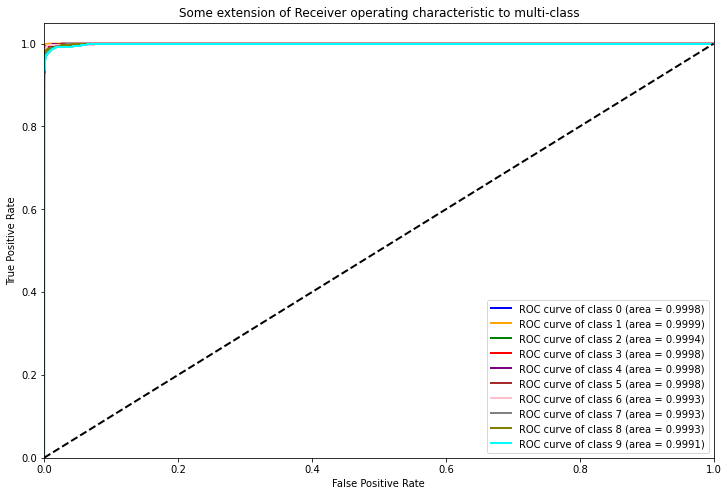

In [ ]:
# Plotar todas as curvas ROC
plt.figure(figsize=(12,8))

colors = cycle(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

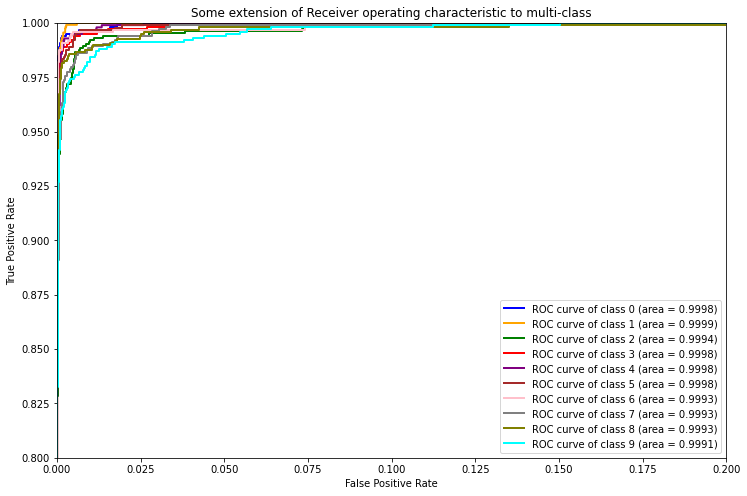

In [ ]:
# Zoom do canto superior esquerdo
plt.figure(figsize=(12,8))
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)

colors = cycle(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

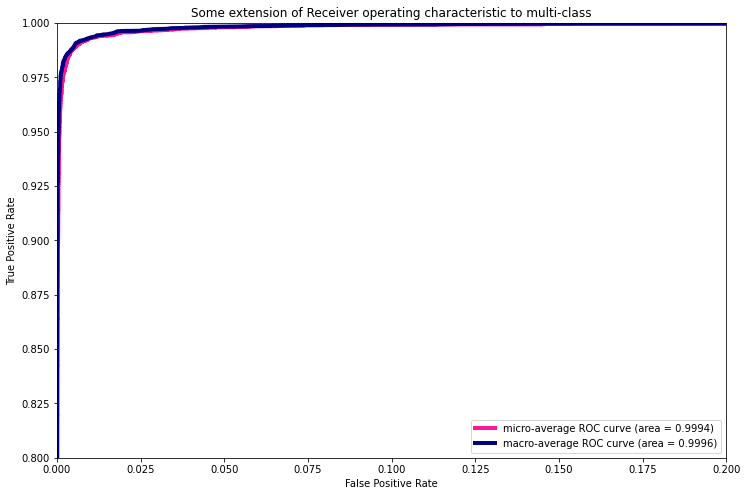

In [ ]:
# Zom das médias micro e macro
plt.figure(figsize=(12,8))
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()